In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys
sys.path.append(r"~/Documents/GitHub/PredictiveModelling/")
import ax_utilities as utl

In [3]:
train = pd.read_csv("Data/train.csv", index_col=0)
test = pd.read_csv("Data/test.csv", index_col=0)
unknown = pd.read_csv("Data/unknown.csv", index_col=0)

In [4]:
X_train = train.drop(columns="Audit_Risk") 
y_train = train["Audit_Risk"]
X_train.shape, y_train.shape

((201, 24), (201,))

In [5]:
X_test = test.drop(columns="Audit_Risk")
y_test = test["Audit_Risk"]
X_test.shape, y_test.shape


((101, 24), (101,))

In [6]:
unknown.shape


(51, 24)

In [7]:
utl.data_quality_report(X_train)

,0,Type,Missing_values,Present_values,Unique_values,Min_value,Max_value
Sector_score,Sector_score,float64,0,201,10,1.85,59.850
PARA_A,PARA_A,float64,0,201,131,0.00,57.030
Score_A,Score_A,float64,0,201,3,0.20,0.600
Risk_A,Risk_A,float64,0,201,131,0.00,34.218
PARA_B,PARA_B,float64,0,201,119,0.00,1264.630
Score_B,Score_B,float64,0,201,3,0.20,0.600
Risk_B,Risk_B,float64,0,201,120,0.00,758.778
TOTAL,TOTAL,float64,0,201,158,0.00,1268.910
numbers,numbers,float64,0,201,4,5.00,6.500
Score_B.1,Score_B.1,float64,0,201,3,0.20,0.600


array([[<Axes: title={'center': 'Sector_score'}>,
        <Axes: title={'center': 'PARA_A'}>,
        <Axes: title={'center': 'Score_A'}>,
        <Axes: title={'center': 'Risk_A'}>,
        <Axes: title={'center': 'PARA_B'}>],
       [<Axes: title={'center': 'Score_B'}>,
        <Axes: title={'center': 'Risk_B'}>,
        <Axes: title={'center': 'TOTAL'}>,
        <Axes: title={'center': 'numbers'}>,
        <Axes: title={'center': 'Score_B.1'}>],
       [<Axes: title={'center': 'Risk_C'}>,
        <Axes: title={'center': 'Money_Value'}>,
        <Axes: title={'center': 'Score_MV'}>,
        <Axes: title={'center': 'Risk_D'}>,
        <Axes: title={'center': 'District_Loss'}>],
       [<Axes: title={'center': 'PROB'}>,
        <Axes: title={'center': 'RiSk_E'}>,
        <Axes: title={'center': 'History'}>,
        <Axes: title={'center': 'Prob'}>,
        <Axes: title={'center': 'Risk_F'}>],
       [<Axes: title={'center': 'Score'}>,
        <Axes: title={'center': 'Inherent_Risk'}>,


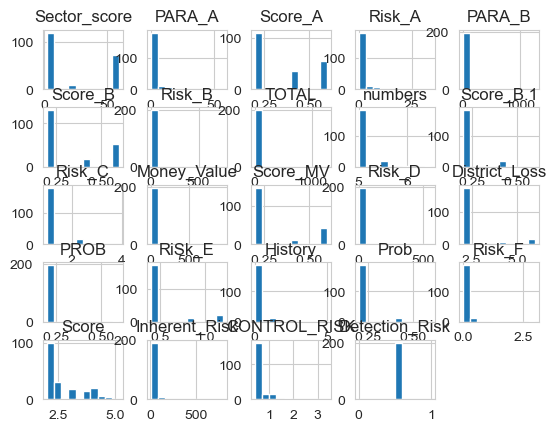

In [8]:
X_train.hist()

In [9]:
X_train.skew() 

Sector_score       0.542164
PARA_A             6.686549
Score_A            0.573502
Risk_A             6.588864
PARA_B            13.017140
Score_B            0.856943
Risk_B            13.011216
TOTAL             12.667689
numbers            4.206004
Score_B.1          3.360539
Risk_C             3.712639
Money_Value        9.143069
Score_MV           1.264587
Risk_D             9.138722
District_Loss      2.592297
PROB               7.234988
RiSk_E             2.310974
History            7.305693
Prob               4.195418
Risk_F             8.738150
Score              0.973600
Inherent_Risk      7.445683
CONTROL_RISK       3.818354
Detection_Risk     0.000000
dtype: float64

<Axes: >

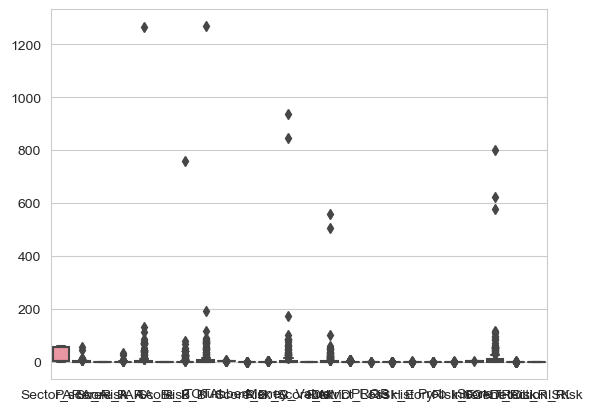

In [10]:
import seaborn as sns

sns.boxplot(X_train)

In [11]:
len(utl.get_all_outliers_indexes(X_train, distance=1.5)) / X_train.shape[0]

0.39303482587064675

In [12]:
X_train.shape

(201, 24)

In [45]:
def get_outliers(df_var, distance=1.5):
    lower = 0
    std = df_var.std()
    outliers = np.where(
        df_var > df_var.mean() + std * distance,
        True,
        np.where(df_var < lower, True, False),
    )
    return df_var.loc[outliers]


def get_all_outliers_indexes(df, print_percentages=False, distance=1.5):
    outliers_set = set()
    for col in df.columns:
        outliers = get_outliers(df[col], distance=distance)
        outliers_amount = outliers.shape[0]
        if print_percentages:
            print(col, "-> ", outliers_amount, " outliers represent: ", round(outliers_amount / df[col].shape[0] * 100, 2), "%")
        outliers_set.update(outliers.index)
    if print_percentages:
        print("TOTAL outliers represent: ", round(len(outliers_set) / df[col].shape[0] * 100, 2), "%")
    return outliers_set


In [46]:
outliers = get_all_outliers_indexes(X_train, distance=3, print_percentages=True) 

Sector_score ->  0  outliers represent:  0.0 %
PARA_A ->  2  outliers represent:  1.0 %
Score_A ->  0  outliers represent:  0.0 %
Risk_A ->  2  outliers represent:  1.0 %
PARA_B ->  1  outliers represent:  0.5 %
Score_B ->  0  outliers represent:  0.0 %
Risk_B ->  1  outliers represent:  0.5 %
TOTAL ->  1  outliers represent:  0.5 %
numbers ->  2  outliers represent:  1.0 %
Score_B.1 ->  2  outliers represent:  1.0 %
Risk_C ->  2  outliers represent:  1.0 %
Money_Value ->  2  outliers represent:  1.0 %
Score_MV ->  0  outliers represent:  0.0 %
Risk_D ->  2  outliers represent:  1.0 %
District_Loss ->  17  outliers represent:  8.46 %
PROB ->  5  outliers represent:  2.49 %
RiSk_E ->  0  outliers represent:  0.0 %
History ->  3  outliers represent:  1.49 %
Prob ->  3  outliers represent:  1.49 %
Risk_F ->  3  outliers represent:  1.49 %
Score ->  0  outliers represent:  0.0 %
Inherent_Risk ->  3  outliers represent:  1.49 %
CONTROL_RISK ->  3  outliers represent:  1.49 %
Detection_Risk 

In [47]:
X_train_orig = pd.DataFrame.copy(X_train) 
X_train.drop(outliers, inplace=True)
X_train_orig.shape

(201, 24)

In [48]:
y_train_orig = pd.DataFrame.copy(y_train)
y_train.drop(outliers, inplace=True)

In [49]:
X_train.skew()

Sector_score      0.417491
PARA_A            2.597745
Score_A           0.768223
Risk_A            2.599840
PARA_B            3.233920
Score_B           1.022523
Risk_B            3.240013
TOTAL             3.021627
numbers           3.620951
Score_B.1         3.620951
Risk_C            3.620951
Money_Value       4.602615
Score_MV          1.639362
Risk_D            4.612171
District_Loss     4.373481
PROB              0.000000
RiSk_E            4.373481
History           4.720434
Prob              4.720434
Risk_F            4.720434
Score             1.145680
Inherent_Risk     3.068655
CONTROL_RISK      2.974319
Detection_Risk    0.000000
dtype: float64

In [50]:
from scipy import stats

In [51]:
transformed_data = pd.DataFrame.copy(X_train)
transformed_data.skew()

Sector_score      0.417491
PARA_A            2.597745
Score_A           0.768223
Risk_A            2.599840
PARA_B            3.233920
Score_B           1.022523
Risk_B            3.240013
TOTAL             3.021627
numbers           3.620951
Score_B.1         3.620951
Risk_C            3.620951
Money_Value       4.602615
Score_MV          1.639362
Risk_D            4.612171
District_Loss     4.373481
PROB              0.000000
RiSk_E            4.373481
History           4.720434
Prob              4.720434
Risk_F            4.720434
Score             1.145680
Inherent_Risk     3.068655
CONTROL_RISK      2.974319
Detection_Risk    0.000000
dtype: float64

In [65]:
lambdas = {}
transformed_data = pd.DataFrame.copy(X_train).drop(columns="numbers")
transformed_data.skew()
for col in transformed_data.columns:
    if np.abs(transformed_data[col].skew()) > 1.5:
        transformed_var, lmd = stats.boxcox(transformed_data[col] + 1)
        if np.abs(lmd) > 5:
            print(col, lmd)
            lmd = 5 if lmd > 0 else -5
            transformed_var = stats.boxcox(transformed_data[col] + 1, lmbda=lmd)
            print(col, ": from ", X_train[col].skew().round(3)," to ", pd.DataFrame(transformed_var).skew()[0].round(3))
        transformed_data[col] = transformed_var
        lambdas[col] = lmd

Score_B.1 -102.61484339017224
Score_B.1 : from  3.621  to  3.621
Risk_C -33.65537573173564
Risk_C : from  3.621  to  3.621
Score_MV -17.30160548619554
Score_MV : from  1.639  to  1.499
District_Loss -42.57812859589022
District_Loss : from  4.373  to  4.373
RiSk_E -86.54497109103097
RiSk_E : from  4.373  to  4.373
History -35.861276222368566
History : from  4.72  to  4.72
Prob -161.2522405652697
Prob : from  4.72  to  4.72
Risk_F -73.87576301714434
Risk_F : from  4.72  to  4.72
CONTROL_RISK -46.152407513829175
CONTROL_RISK : from  2.974  to  2.974


In [62]:
transformed_data["numbers"]

0      0.199974
1      0.199974
2      0.199983
3      0.199974
4      0.199974
         ...   
194    0.199974
196    0.199974
197    0.199974
199    0.199974
200    0.199974
Name: numbers, Length: 174, dtype: float64

In [63]:
X_train_orig.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.0
mean,22.800746,2.459257,0.344279,1.354836,15.636261,0.321393,9.250396,18.075866,5.054726,0.220896,...,2.417910,0.206965,0.497512,0.099502,0.216915,0.048756,2.709453,22.795359,0.546269,0.5
std,25.441598,5.736470,0.173435,3.475666,91.161579,0.174327,54.715229,92.190871,0.185715,0.067537,...,1.159516,0.046382,0.245038,0.458312,0.065669,0.256536,0.860209,83.600051,0.376694,0.0
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5
25%,2.370000,0.240000,0.200000,0.048000,0.000000,0.200000,0.000000,0.490000,5.000000,0.200000,...,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.562000,0.400000,0.5
50%,3.890000,0.800000,0.200000,0.160000,0.460000,0.200000,0.092000,1.270000,5.000000,0.200000,...,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.240000,0.400000,0.5
75%,55.570000,2.420000,0.600000,1.452000,4.160000,0.600000,2.040000,7.170000,5.000000,0.200000,...,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.200000,12.590000,0.400000,0.5
max,59.850000,57.030000,0.600000,34.218000,1264.630000,0.600000,758.778000,1268.910000,6.500000,0.600000,...,6.000000,0.600000,1.200000,5.000000,0.600000,3.000000,5.200000,801.262000,3.400000,0.5


In [36]:
from sklearn.metrics import (mean_squared_error,r2_score)

def get_model_metrics(actual, predicted):
    print("RMSE: %0.2f"%(mean_squared_error(actual, predicted)))
    print("r2_score:  %0.2f"%r2_score(actual, predicted))

In [37]:
from sklearn.linear_model import LinearRegression


In [125]:
# BASE MODEL
base_model = LinearRegression()
print(X_train_orig.shape)
base_model.fit(X_train_orig, y_train_orig)
print("Training:")
predicted = base_model.predict(X_train_orig)
get_model_metrics(predicted, y_train_orig)
print("Testing:")
predicted = base_model.predict(X_test)
get_model_metrics(predicted, y_test)

(201, 24)
Training:
RMSE: 71.52
r2_score:  0.98
Testing:
RMSE: 229.21
r2_score:  0.60


In [98]:
from sklearn import preprocessing
# data['Refractive_index_scale'] = preprocessing.scale(data.Refractive_index)

def transform_input_1(data):
    transformed = pd.DataFrame.copy(data).drop(columns="numbers")
    for col in data.columns:
        if col in lambdas.keys():
            transformed[col] = preprocessing.scale(transformed[col])
            transformed_var = stats.boxcox(transformed[col] + 1, lmbda=lambdas[col])
            transformed[col] = transformed_var
    return transformed

In [99]:
trans_x_test = transform_input_1(X_test)

In [101]:
trans_x_test = transform_input_1(X_test)

trans_x_test.skew()

Sector_score       0.850694
PARA_A             1.261253
Score_A            0.445792
Risk_A             0.907237
PARA_B             1.811757
Score_B            1.050085
Risk_B             1.779677
TOTAL              1.579351
Score_B.1          2.725775
Risk_C             2.725783
Money_Value        2.819963
Score_MV           1.461245
Risk_D             2.441618
District_Loss      1.538503
PROB              10.049876
RiSk_E             1.461246
History            3.442967
Prob               3.442959
Risk_F             3.443083
Score              1.155053
Inherent_Risk      1.907402
CONTROL_RISK       1.126506
Detection_Risk     0.000000
dtype: float64

In [96]:
no_outliers = get_all_outliers_indexes(X_test) 
no_x = X_test.drop(no_outliers)
no_y = y_test.drop(no_outliers)

In [131]:
mean=X_train.mean()
std=X_train.std()

In [140]:
mean["Score_A"]

0.3275862068965517

In [141]:
from sklearn import preprocessing
# data['Refractive_index_scale'] = preprocessing.scale(data.Refractive_index)

def transform_input_2(data):
    transformed = pd.DataFrame.copy(data)
    for col in data.columns:
        if col in lambdas.keys():
            transformed[col] = (transformed[col] - mean[col]) / std[col]
            print(transformed[col].std())
    return transformed

In [173]:
def transform_input_3(data):
    transformed = pd.DataFrame.copy(data)
    for cola in data.columns:
        transformed[cola] = transformed[cola] + 0.1
    return transformed

In [ ]:
transformed_data.skew()
lambdas = {}
transformed_data = pd.DataFrame.copy(X_train).drop(columns="numbers")
transformed_data.skew()
for col in transformed_data.columns:
    if np.abs(transformed_data[col].skew()) > 1.5:
        transformed_var, lmd = stats.boxcox(transformed_data[col] + 1)
        if np.abs(lmd) > 5:
            print(col, lmd)
            lmd = 5 if lmd > 0 else -5
            transformed_var = stats.boxcox(transformed_data[col] + 1, lmbda=lmd)
            print(col, ": from ", X_train[col].skew().round(3), " to ",
                  pd.DataFrame(transformed_var).skew()[0].round(3))
        transformed_data[col] = transformed_var
        lambdas[col] = lmd

In [208]:
no_X_test = X_test.drop(get_all_outliers_indexes(X_test, distance=4))
no_y_test = y_test.drop(get_all_outliers_indexes(X_test, distance=4))
no_X_test.shape, no_y_test.shape

((94, 24), (94,))

In [209]:
# BOX COX MODEL
bc_model = LinearRegression()
trans_x_train = transform_input_1(X_train)

trans_x_test = transform_input_1(no_X_test)

bc_model.fit(trans_x_train, y_train)
print("Training:")
predicted = bc_model.predict(trans_x_train)
get_model_metrics(predicted, y_train)

print("Testing:")
predicted = bc_model.predict(trans_x_test)
get_model_metrics(predicted, no_y_test)    

Training:
RMSE: 3.82
r2_score:  0.85
Testing:
RMSE: 1211.64
r2_score:  -4.42


In [202]:
y_train - predicted

0     -1.411932
1      1.461606
2     -1.865689
3      0.227934
4      0.177937
         ...   
194    0.013633
196   -0.051823
197   -0.443774
199    0.780426
200    0.640824
Name: Audit_Risk, Length: 174, dtype: float64

In [144]:
predicted

array([-7.43716752e-01, -6.99869595e+01, -3.68857078e+02, -4.38171959e+01,
       -1.11966740e+02, -1.97557436e+00, -3.65484674e+01, -1.21238989e+02,
       -7.33424103e+01, -3.21189866e+02, -9.12448676e+00, -1.88910598e+02,
       -1.71135240e+01, -2.90129501e+02, -7.26403155e+00, -6.38266853e+02,
       -3.41019300e+01, -4.73938383e+01, -1.46126326e+02,  2.37749195e+01,
       -3.41246904e+02, -4.73514792e+01,  3.35057401e+02, -2.34678275e+02,
       -4.34804785e+02,  1.96326592e+01, -2.27204620e+01, -7.56953098e+01,
       -1.21422494e+03, -4.49870144e+02, -5.52571805e+01, -6.75191672e+02,
       -3.43427418e+00, -6.14719115e+02, -8.91034252e+01, -2.27147824e+03,
        2.66435823e+02,  1.74350222e+01, -1.28648590e+02,  5.35563939e+00,
       -9.26110091e+01,  3.90638861e+02, -1.50137352e+02, -7.38756705e+02,
       -6.12460579e+00, -2.31377398e+02, -9.71234132e+02, -1.09446668e+02,
       -6.22439739e+01, -1.03402171e+02, -3.63328246e+00, -8.75194895e+01,
        3.70567758e+00, -

In [145]:
y_test

200    0.2892
201    0.3364
202    3.8508
203    0.3044
204    0.3188
        ...  
296    0.3184
297    0.4036
298    0.3720
299    0.2800
300    0.2800
Name: Audit_Risk, Length: 101, dtype: float64

In [175]:
from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=len(X_test.columns))
pls.fit(X_train, y_train)
X_train_pls = pd.DataFrame(pls.transform(X_train))

In [176]:
y_predict = pls.predict(X_test)

In [177]:
get_model_metrics(y_predict, y_test)

RMSE: 103261929533008684366534495174656.00
r2_score:  -0.03


In [215]:
full = train.append(test)

/var/folders/51/l057c8xx2md597vhk47n57rm0000gn/T/ipykernel_9720/3192242342.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  full = train.append(test)


In [216]:
full

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,1.99,0.4,0.796,10.24,0.6,6.144,12.23,5.0,0.2,...,0.2,0.4,0,0.2,0.0,3.8,20.808,0.4,0.5,4.1616
1,2.37,1.86,0.4,0.744,4.51,0.6,2.706,6.37,5.0,0.2,...,0.2,0.4,0,0.2,0.0,3.6,7.758,0.4,0.5,1.5516
2,55.57,0.70,0.2,0.140,0.79,0.2,0.158,1.49,5.5,0.4,...,0.2,0.4,0,0.2,0.0,2.4,3.280,0.4,0.5,0.6560
3,55.57,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.404,0.4,0.5,0.2808
4,21.61,0.29,0.2,0.058,0.33,0.2,0.066,0.62,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.524,0.4,0.5,0.3048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2.72,0.96,0.2,0.192,0.00,0.2,0.000,0.96,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.592,0.4,0.5,0.3184
297,1.85,0.60,0.2,0.120,1.08,0.4,0.432,1.68,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.6,2.018,0.4,0.5,0.4036
298,55.57,1.07,0.4,0.428,0.16,0.2,0.032,1.23,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.2,1.860,0.4,0.5,0.3720
299,1.99,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,...,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800


In [284]:
full_clean = full.drop(get_all_outliers_indexes(full.drop(columns="Audit_Risk"), distance=3))

In [285]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(full.drop(columns="Audit_Risk"), full["Audit_Risk"],
                                                    test_size=0.1, random_state=0)

In [286]:
# BASE MODEL
base_model = LinearRegression()
print(X_train_orig.shape)
base_model.fit(X_train, y_train)
print("Training:")
predicted = base_model.predict(X_train)
get_model_metrics(predicted, y_train)
print("Testing:")
predicted = base_model.predict(X_test)
get_model_metrics(predicted, y_test)

(201, 24)
Training:
RMSE: 90.84
r2_score:  0.98
Testing:
RMSE: 38.60
r2_score:  0.57


In [287]:
lambdas = {}
transformed_data = pd.DataFrame.copy(X_train)
transformed_data.skew()
for col in transformed_data.columns:
    if np.abs(transformed_data[col].skew()) > 1.5:
        transformed_var, lmd = stats.boxcox(transformed_data[col] + 1)
        if np.abs(lmd) > 5:
            print(col, lmd)
            lmd = 5 if lmd > 0 else -5
            transformed_var = stats.boxcox(transformed_data[col] + 1, lmbda=lmd)
            print(col, ": from ", X_train[col].skew().round(3)," to ", pd.DataFrame(transformed_var).skew()[0].round(3))
        transformed_data[col] = transformed_var
        lambdas[col] = lmd

numbers -79.39696426260203
numbers : from  7.237  to  3.556
Score_B.1 -51.71287155422162
Score_B.1 : from  3.365  to  2.858
Risk_C -16.717017631483323
Risk_C : from  4.069  to  2.698
District_Loss -8.516906197376233
District_Loss : from  2.206  to  1.884
PROB -361.26869017998325
PROB : from  9.68  to  8.461
RiSk_E -14.921448887310929
RiSk_E : from  2.084  to  1.788
History -15.232586012636943
History : from  6.149  to  3.28
Prob -69.75857554807607
Prob : from  4.033  to  3.468
Risk_F -25.25941542497374
Risk_F : from  7.002  to  3.334
CONTROL_RISK -9.61466651545462
CONTROL_RISK : from  3.79  to  1.447


In [288]:
def transform_input_1(data):
    transformed = pd.DataFrame.copy(data)
    for col in data.columns:
        if col in lambdas.keys():
            transformed_var = stats.boxcox(transformed[col] + 1, lmbda=lambdas[col])
            transformed[col] = transformed_var
    return transformed

In [314]:
x_test_2 = X_test[y_test < 3]
y_test_2 = y_test[y_test < 3]

# y_test.drop(out.index)

In [315]:
# BOX COX MODEL
bc_model = LinearRegression()
trans_x_train = transform_input_1(X_train)

trans_x_test = transform_input_1(x_test_2)

bc_model.fit(trans_x_train, y_train)
print("Training:")
predicted = bc_model.predict(trans_x_train)
get_model_metrics(y_train, predicted)

print("Testing:")
predicted = bc_model.predict(x_test_2)
get_model_metrics(y_test_2, predicted)   

Training:
RMSE: 1503.95
r2_score:  0.60
Testing:
RMSE: 210620822300906.50
r2_score:  -1152026287713177.00


In [291]:
y_train.describe()

count    271.000000
mean      10.357866
std       61.661521
min        0.280000
25%        0.314600
50%        0.549200
75%        2.913200
max      961.514400
Name: Audit_Risk, dtype: float64

In [295]:
np.sum(y_train > 0)

271